<a href="https://colab.research.google.com/github/GustavoMiec/KNN_SVM_POS/blob/main/KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
%pip install plotly-express

In [162]:
import pandas as pd
import missingno as msno
import seaborn as sb
import plotly_express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, minmax_scale
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

In [81]:
dados = pd.read_excel("Recrutamento.xlsx")

In [82]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [83]:
dados.shape

(215, 15)

In [84]:
set(dados.status)

{'No', 'Yes'}

In [85]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [124]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          215 non-null    float64
dtypes: float64(6), int64(5), object(4)
memory usage: 25.3+ KB


<Axes: >

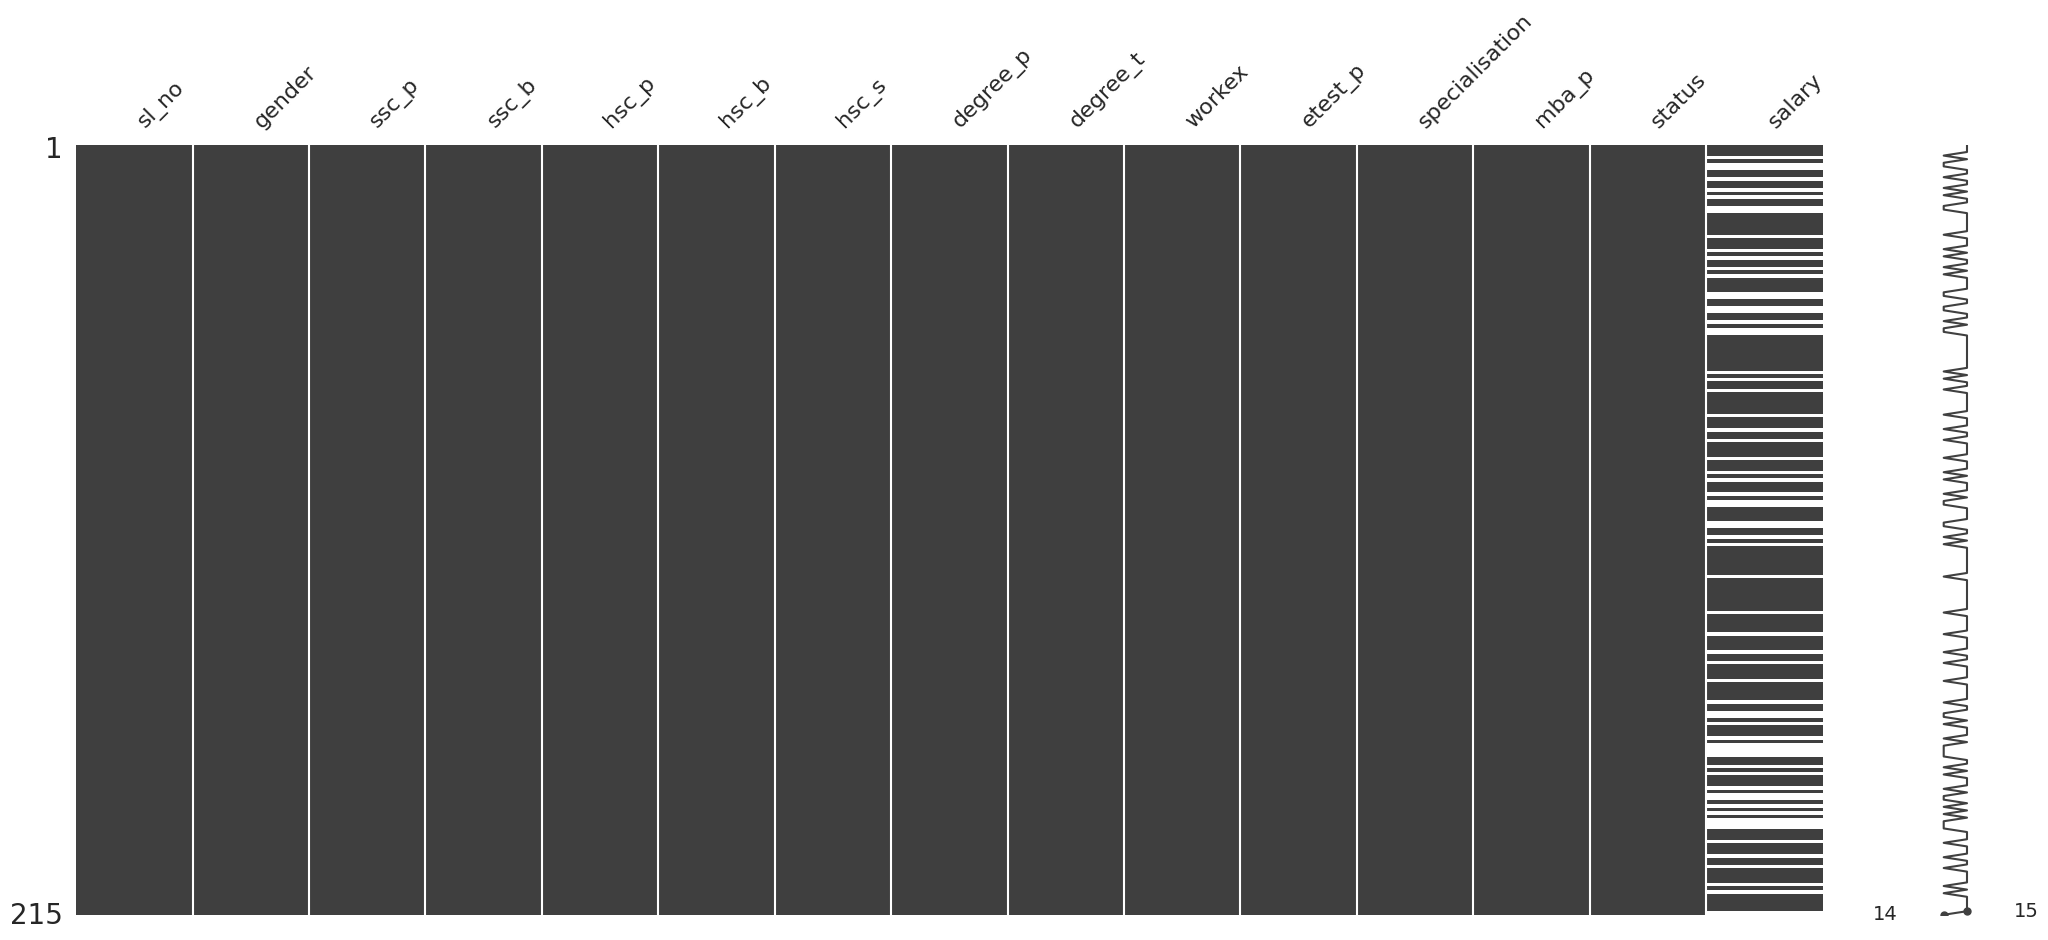

In [87]:
msno.matrix(dados)

In [88]:
dados.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


/tmp/ipython-input-2309832914.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='status', ylabel='salary'>

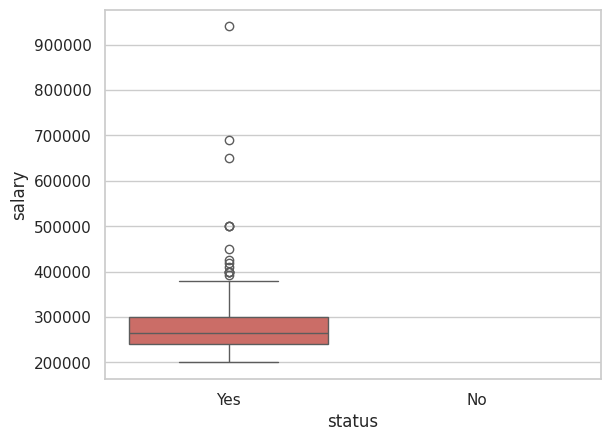

In [89]:
sb.boxplot(x="status", y="salary", data=dados, palette="hls")

In [90]:
dados["salary"].fillna(value=0, inplace=True)

/tmp/ipython-input-3618700821.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [91]:
dados.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


<Axes: xlabel='hsc_p'>

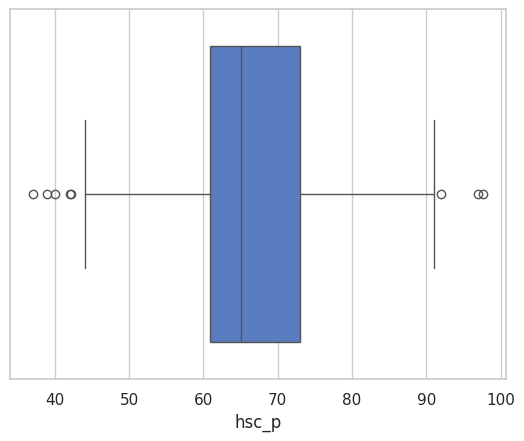

In [92]:
sb.boxplot(x=dados["hsc_p"])

<Axes: xlabel='hsc_p', ylabel='Count'>

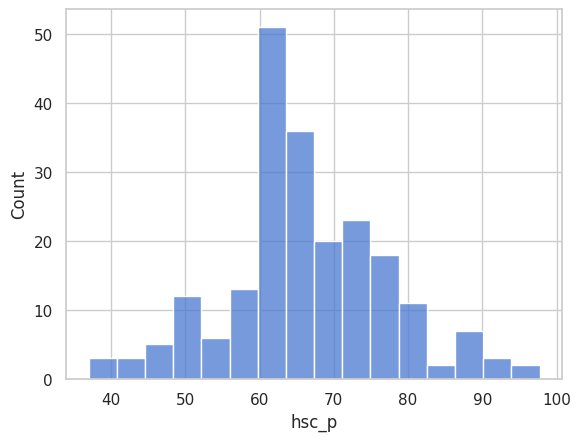

In [93]:
sb.histplot(data=dados, x="hsc_p")

<Axes: xlabel='degree_p'>

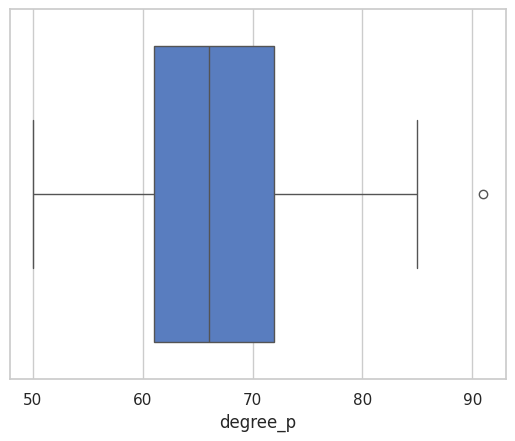

In [94]:
sb.boxplot(x=dados["degree_p"])

<Axes: xlabel='degree_p', ylabel='Count'>

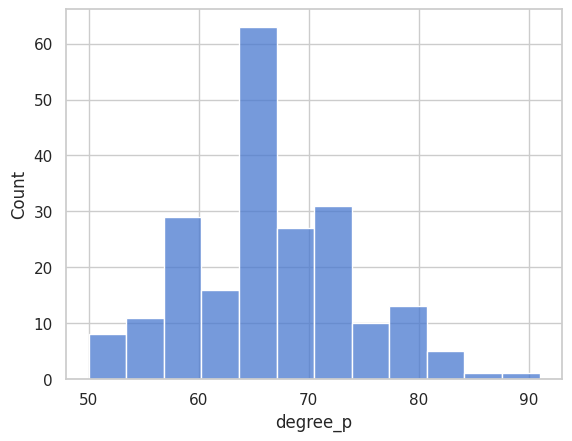

In [95]:
sb.histplot(data=dados, x="degree_p")

<Axes: xlabel='etest_p'>

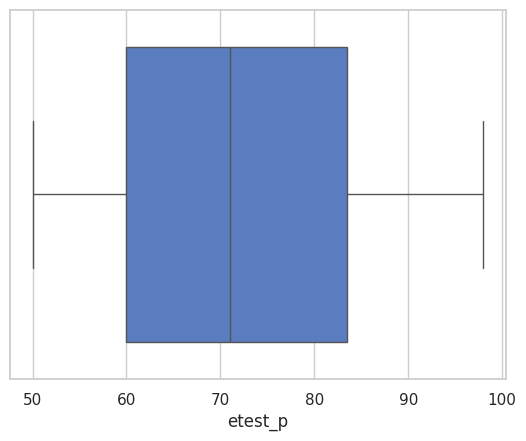

In [96]:
sb.boxplot(x=dados["etest_p"])

<Axes: xlabel='mba_p'>

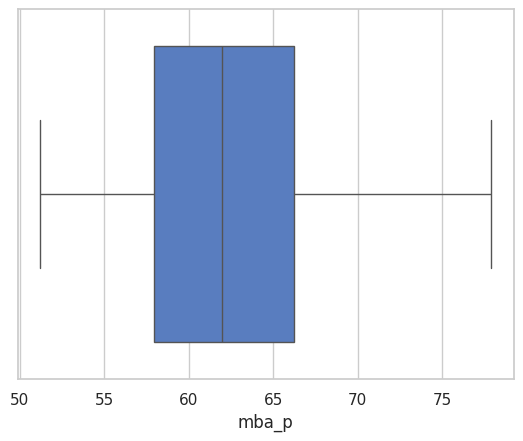

In [97]:
sb.boxplot(x=dados["mba_p"])

<Axes: xlabel='salary'>

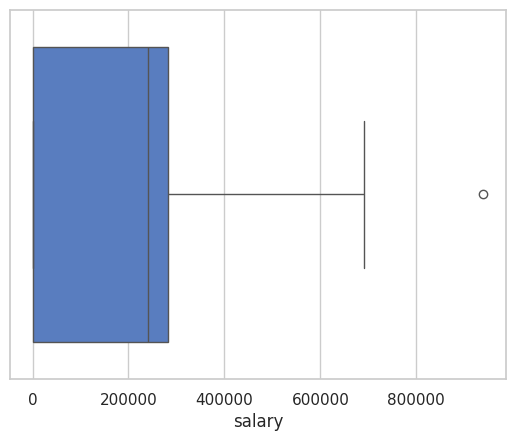

In [98]:
sb.boxplot(x=dados["salary"])

<Axes: xlabel='salary', ylabel='Count'>

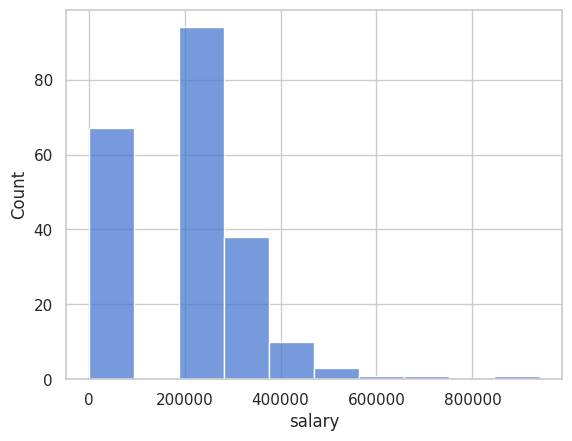

In [99]:
sb.histplot(data=dados, x="salary")

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



[Text(37.0, 0.5, 'mba_p')]

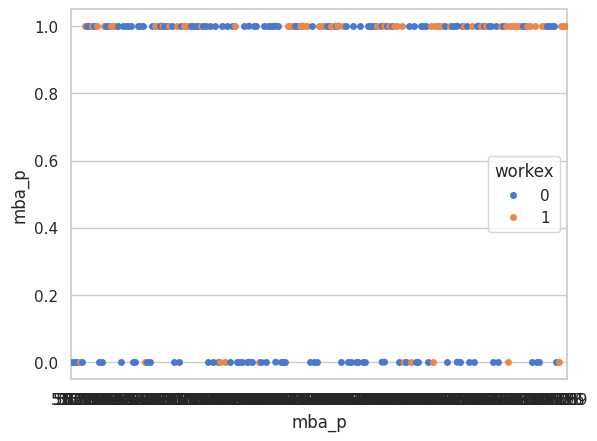

In [126]:
sb.set_theme(style="whitegrid", palette="muted")
ax=sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel= "mba_p")

In [101]:
px.violin(dados, y="salary", x="specialisation", color="gender", box=True, points="all" )

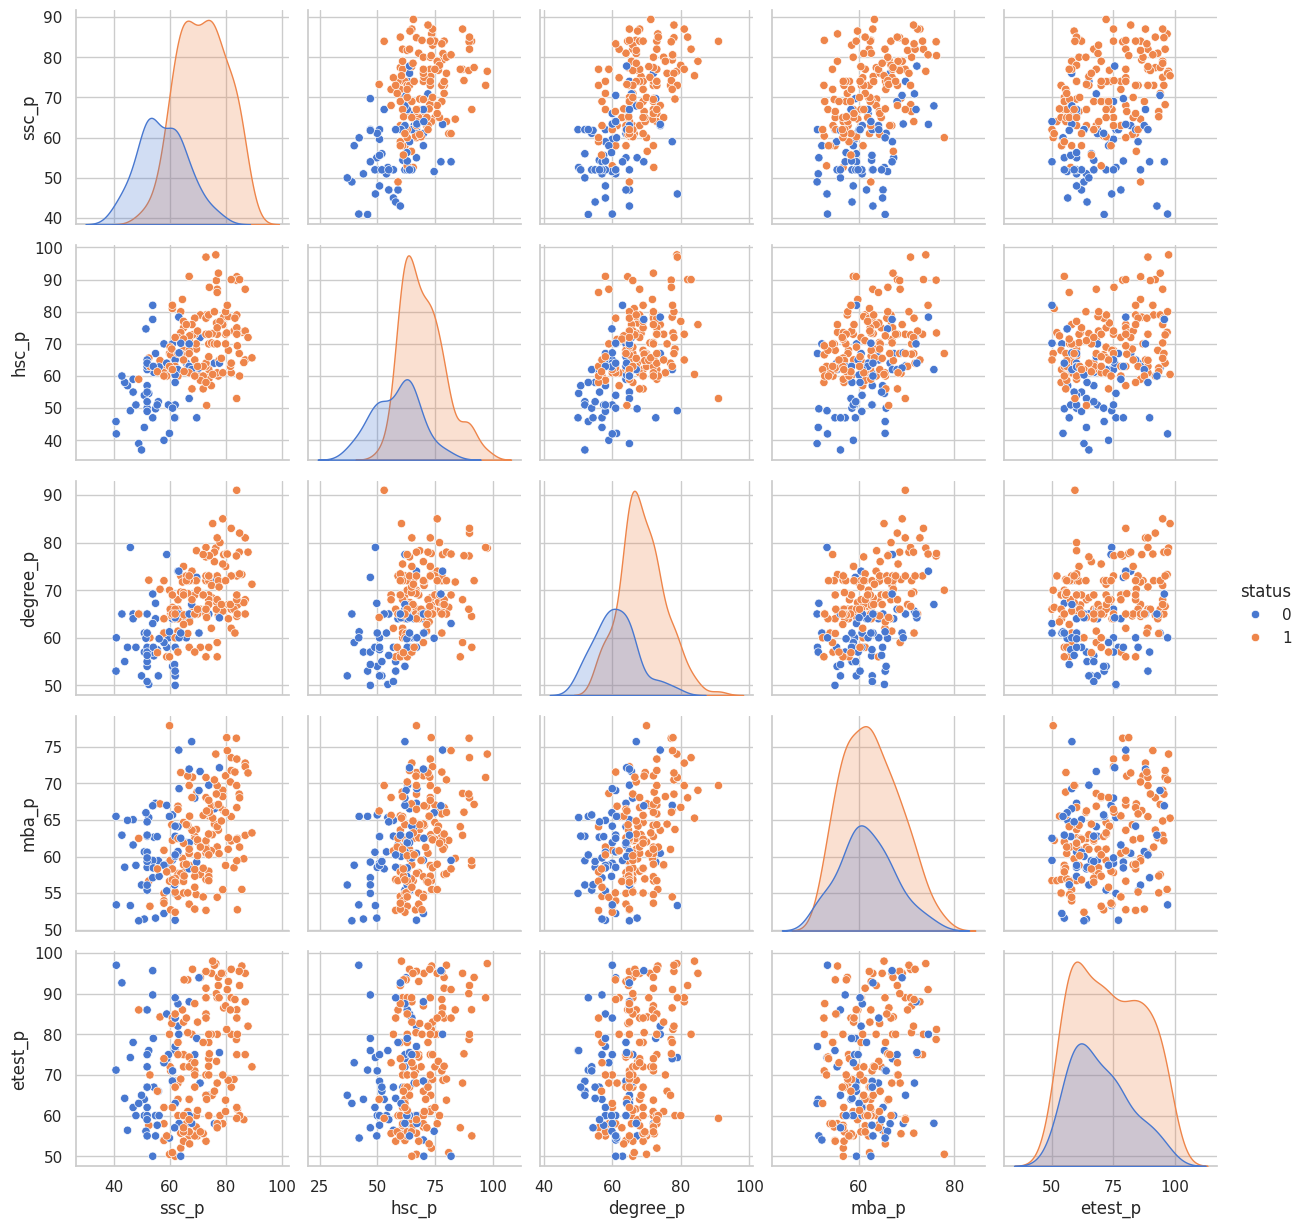

In [127]:
sb.pairplot(dados,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

<Axes: >

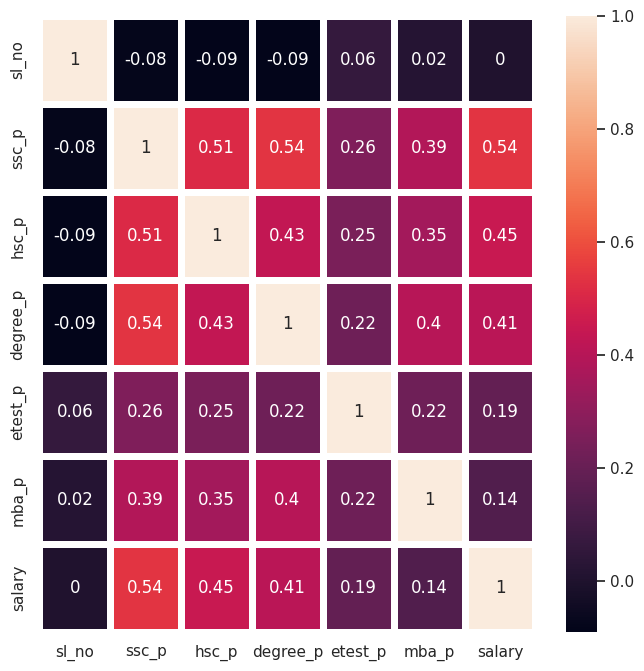

In [102]:
correlation_matriz = dados.select_dtypes(include=['number']).corr().round(2)


fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

In [103]:
dados.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Yes,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,No,0.0
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,No,0.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Yes,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Yes,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,No,0.0


In [129]:
colunas=['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])

In [105]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [130]:
dummy_hsc_s=pd.get_dummies(dados['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(dados['degree_t'], prefix='dummy')

dados_coeded = pd.concat([dados,dummy_hsc_s,dummy_degree_t],axis=1)
dados_coeded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)

In [132]:
dados_coeded.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True


<Axes: >

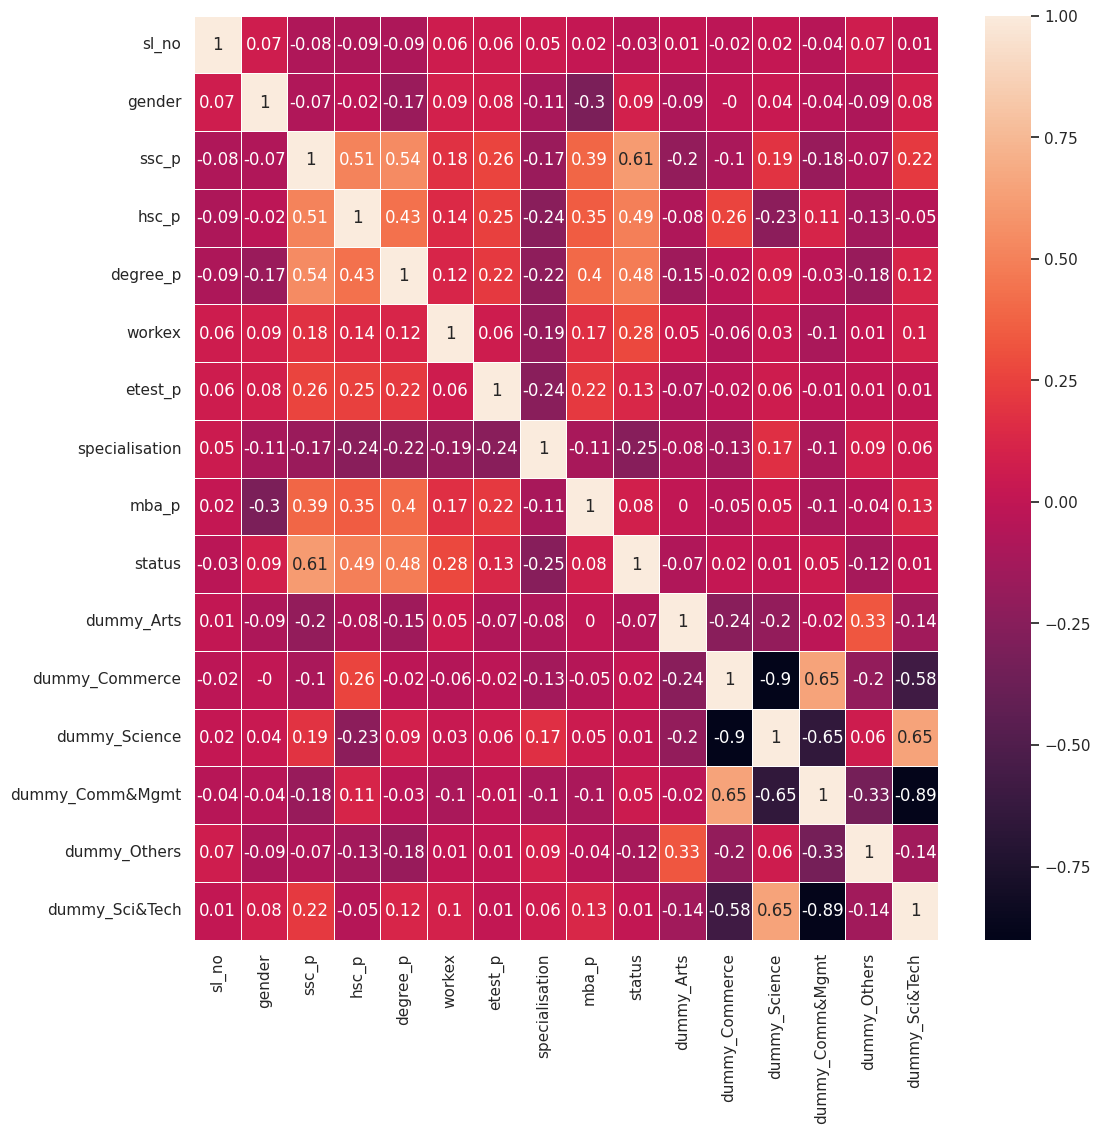

In [136]:
dados_numeric_coeded = dados_coeded.drop(['ssc_b', 'hsc_b'], axis=1)
correlation_matrix = dados_numeric_coeded.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

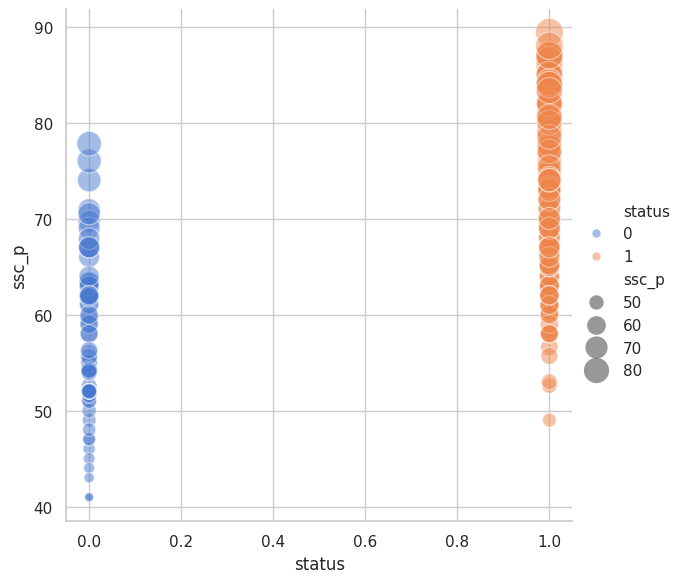

In [137]:
sb.relplot(x="status", y="ssc_p", hue="status", size="ssc_p",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dados_coeded)


In [138]:

x = dados_coeded[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']] #variaveis independentes
y = dados_coeded['status'] #target

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [141]:
x_train.shape

(172, 5)

In [142]:
x_test.shape

(43, 5)

In [143]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [118]:
x

,ssc_p,hsc_p,workex,mba_p
0,67.00,91.00,0,58.80
1,79.33,78.33,1,66.28
2,65.00,68.00,0,57.80
3,56.00,52.00,0,59.43
4,85.80,73.60,0,55.50
...,...,...,...,...
210,80.60,82.00,0,74.49
211,58.00,60.00,0,53.62
212,67.00,67.00,1,69.72
213,74.00,66.00,0,60.23


In [119]:
y

,status
0,1
1,1
2,1
3,0
4,1
...,...
210,1
211,1
212,1
213,1


In [121]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [122]:
x_train_escalonado

array([[-1.39473047e+00, -3.54256881e-01, -7.04025691e-01,
        -1.15170167e+00],
       [ 2.62928483e-01, -2.66971493e-01,  1.42040271e+00,
        -3.84702636e-02],
       [ 5.39204976e-01,  1.04230932e+00,  1.42040271e+00,
        -1.14418834e-02],
       [-1.33480096e-02, -2.66971493e-01, -7.04025691e-01,
        -3.07064792e-01],
       [ 1.23910542e+00,  1.39145088e+00, -7.04025691e-01,
         2.07143267e+00],
       [-4.73808831e-01, -2.66971493e-01, -7.04025691e-01,
        -8.78039325e-01],
       [ 6.49715573e-01,  1.88024905e+00,  1.42040271e+00,
         6.47374885e-01],
       [ 7.60226170e-01, -4.85184963e-01, -7.04025691e-01,
         5.10543710e-01],
       [ 5.39204976e-01, -7.03398433e-01, -7.04025691e-01,
        -9.06756979e-01],
       [ 8.61527550e-01,  2.76183147e+00, -7.04025691e-01,
         1.99034753e+00],
       [-3.54089017e-01,  1.07111350e+00, -7.04025691e-01,
         2.08325759e+00],
       [-8.42177487e-01, -2.27453541e+00, -7.04025691e-01,
      

In [146]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10): #range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(x_train_escalonado, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_escalonado) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

Text(0, 0.5, 'Mean Error')

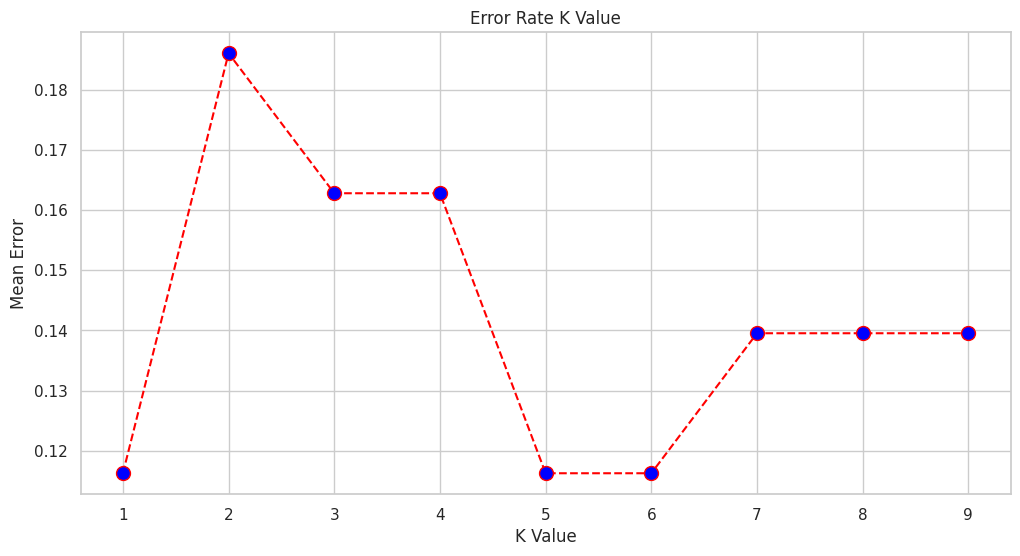

In [147]:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [148]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [151]:
y_predito = modelo_classificador.predict(x_test_escalonado)

In [152]:
y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [154]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.8837209302325582


In [156]:
svm = Pipeline([
    ("linear_svc", LinearSVC(C=1))
])

svm.fit(x_train_escalonado, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [157]:
y_predito_svm = svm.predict(x_test_escalonado)

In [158]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


In [160]:
y_prob = modelo_classificador.predict_proba(x_test)[:,1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [163]:
poly_svm = Pipeline([
    ("svm", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
svm.fit(x_train, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])